<a href="https://colab.research.google.com/github/mmovahed/Spectral_Methods/blob/main/RationalJacobiGalerkinMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Galerkin weighted residual method

Consider the Fredholm integral equation:

$u(x)=e^{x} - x + \int_{0}^{1} xtu(t)$



Coefficients: [1.00005264 0.99844837 0.51057918 0.13966286 0.06948113]
MAE: 1.4719152187292473e-05


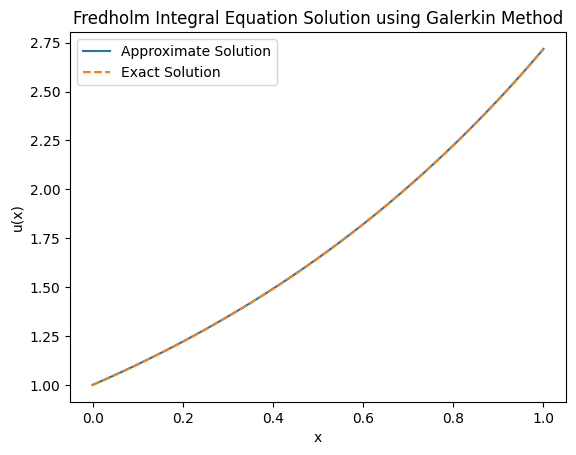

In [19]:
import numpy as np
import scipy.integrate as spi
import scipy.linalg as spl

# Number of basis functions
N = 5
S = lambda x: np.exp(x) - x
K = lambda x, t: x * t

# Define the basis functions
def basis_function(i, x):
    return x ** i

# Inner product calculation
def inner_product(f, g):
    return spi.quad(lambda x: f(x) * g(x), 0, 1)[0]

# Assemble the matrix A and vector b
A = np.zeros((N, N))
b = np.zeros(N)

for i in range(N):
    b[i] = inner_product(lambda x: basis_function(i, x), lambda x: S(x))
    for j in range(N):
        A[i, j] = inner_product(lambda x: basis_function(i, x),
                                lambda x: basis_function(j, x) - spi.quad(lambda t: K(x,t) * basis_function(j, t), 0, 1)[0])

# Solve the linear system A * c = b for coefficients c
c = spl.solve(A, b)

# Define the approximate solution
def u_approx(x):
    return sum(c[i] * basis_function(i, x) for i in range(N))

# Display the coefficients
print("Coefficients:", c)
print("MAE:", np.mean(np.abs(u_values - exact_values)))

# Example usage: evaluate u_approx at some points
x_values = np.linspace(0, 1, 100)
u_values = [u_approx(x) for x in x_values]
exact_values = np.exp(x_values)

# Plot the approximate solution
import matplotlib.pyplot as plt

plt.plot(x_values, u_values, label='Approximate Solution')
plt.plot(x_values, exact_values, label='Exact Solution', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Fredholm Integral Equation Solution using Galerkin Method')
plt.show()

Coefficients: [1.69030903e+00 4.19591988e-01 5.57250234e-02 4.96293769e-03
 3.30285829e-04 1.74927529e-05 7.68159701e-07 2.87837245e-08
 9.40644611e-10 2.72120992e-11]
MAE: 1.4719152187292473e-05


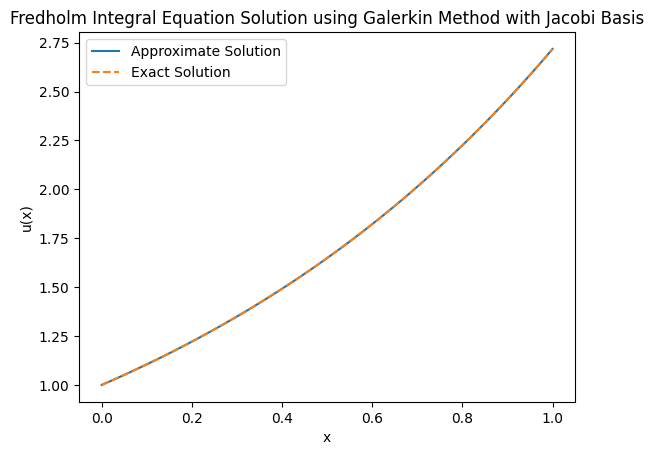

In [20]:
import numpy as np
import scipy.integrate as spi
import scipy.linalg as spl
import scipy.special as sp

# تعداد توابع پایه
N = 10

# تابع کرنل و تابع سمت راست
S = lambda x: np.exp(x) - x
K = lambda x, t: x * t

# تابع پایه ژاکوبی
def basis_function(i, x):
    return sp.jacobi(i, +1, +1)(2*x - 1)  # تبدیل بازه [0,1] به [-1,1]

# ضرب داخلی با وزن ژاکوبی (چون α=0, β=0 وزن 1 است)
def inner_product(f, g):
    return spi.quad(lambda x: f(x) * g(x), 0, 1)[0]

# مقداردهی اولیه‌ی ماتریس A و بردار b
A = np.zeros((N, N))
b = np.zeros(N)

for i in range(N):
    b[i] = inner_product(lambda x: basis_function(i, x), lambda x: S(x))
    for j in range(N):
        def kernel_integral(x):
            return spi.quad(lambda t: K(x, t) * basis_function(j, t), 0, 1)[0]
        A[i, j] = inner_product(lambda x: basis_function(i, x), lambda x: basis_function(j, x) - kernel_integral(x))

# حل دستگاه معادلات
c = spl.solve(A, b)

# تقریب حل عددی
def u_approx(x):
    return sum(c[i] * basis_function(i, x) for i in range(N))

# نمایش ضرایب
print("Coefficients:", c)
print("MAE:", np.mean(np.abs(u_values - exact_values)))

# ارزیابی روی بازه [0,1]
x_values = np.linspace(0, 1, 100)
u_values = [u_approx(x) for x in x_values]
exact_values = np.exp(x_values)

# نمایش نمودار
import matplotlib.pyplot as plt

plt.plot(x_values, u_values, label='Approximate Solution')
plt.plot(x_values, exact_values, label='Exact Solution', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Fredholm Integral Equation Solution using Galerkin Method with Jacobi Basis')
plt.show()
